# 曲线图

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_style("whitegrid")

In [3]:
fmri = pd.read_csv("../seaborn-data/fmri.csv")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


基础曲线图。

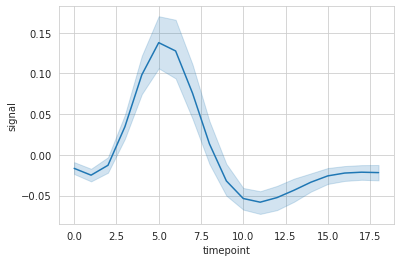

In [6]:
ax = sns.lineplot(data=fmri, x="timepoint", y="signal")

提供一个分类变量，根据类别对数据进行分组，创建多条曲线，并使用不同的颜色。

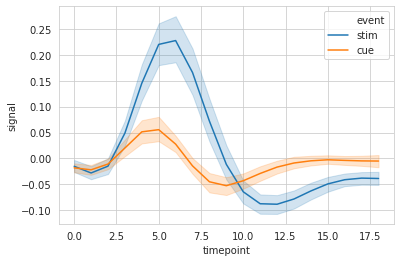

In [8]:
# hue: 提供一个分类变量，不同类别使用不同的颜色
ax = sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

结合'hue'和'patette'，使用不同的调色板。

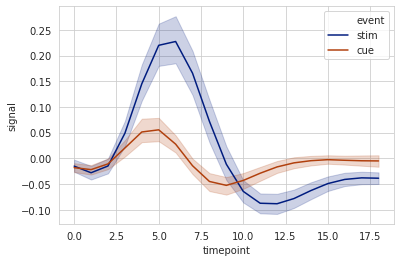

In [9]:
# pelette: 使用不同的调色板
palette = sns.color_palette(
    palette="dark",  # seaborn或matplotlib提供的调色板
    n_colors=2  # 颜色数量，必须和提供给hue的分类变量的类别数相同
)

ax = sns.lineplot(data=fmri, x="timepoint", y="signal",
                  hue="event", palette=palette)

提供一个分类变量，根据类别对数据分组，创建多条曲线，每条曲线使用不同的样式。

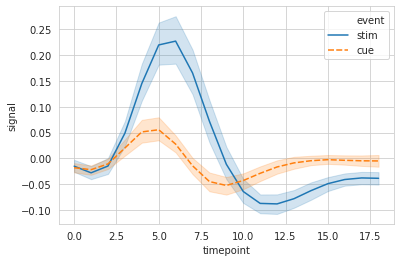

In [12]:
# style: 根据分类变量，不同类别使用不同的曲线样式
ax = sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", style="event")

在曲线上添加点。

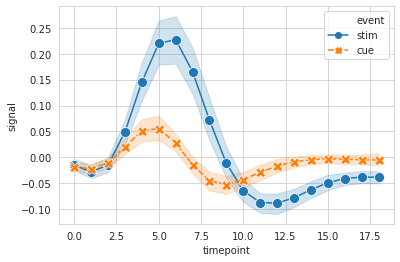

In [17]:
# markers = True, 曲线添加点
# markersize: 控制点的大小，传递给mpl.ax.plot
ax = sns.lineplot(data=fmri, x="timepoint", y="signal",
                  hue="event", style="event",
                  markers=True, markersize=10)

是否显示误差，以及误差的显示方式。

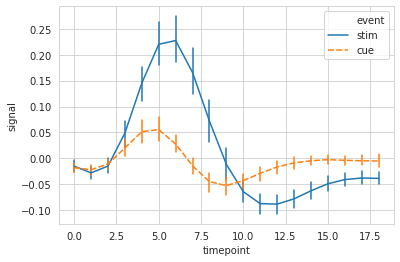

In [19]:
# err_style: 控制误差的样式，默认为'band(通道)', 可以设置为'bars(柱子)'
# ci: 置信区间的大小，None表示不显示置信区间
ax = sns.lineplot(data=fmri, x="timepoint", y="signal",
                  hue="event", style="event",
                  err_style="bars", ci=95)

Seaborn默认数据框是long-format，但也可以操作wide-format.

In [22]:
np.random.seed(123)
df_wide = pd.DataFrame(np.random.normal(size=(100, 10)),
                       index=pd.date_range("2020-01-01", periods=100, name="date"),
                       columns=[f"col{i}" for i in range(10)])
df_wide = df_wide.cumsum()
df_wide.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
date,,,,,,,,,,
2020-01-01,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2020-01-02,-1.764517,0.902636,1.774368,-2.145197,-1.022582,1.217085,-0.220749,1.757873,2.269990,-0.480554
2020-01-03,-1.027148,2.393369,0.838534,-0.969368,-2.276463,0.579334,0.686356,0.329193,2.129921,-1.342309
2020-01-04,-1.282768,-0.405221,-0.932999,-1.669245,-1.349000,0.405698,0.689202,1.017415,1.250385,-1.058682
2020-01-05,-2.088134,-2.132890,-1.323899,-1.095439,-1.010411,0.393868,3.081567,1.430328,2.229121,1.179462


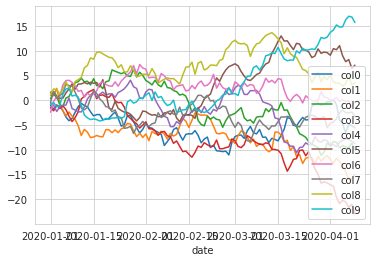

In [25]:
# sns可以一次性将所有列变量映射到图上，并且会自动赋予每条曲线不同的颜色和样式
# 由于曲线样式有限，如果列变量太多会引发异常，这时候设置dashes=False，令所有曲线为实线
# 对于曲线图而言，当曲线太多，使用不同的样式反而造成视觉混乱
ax=sns.lineplot(data=df_wide, dashes=False)

改变图表的大小。最简单的方式是先创建fig,ax对象，然后将ax传递给sns.lineplot.

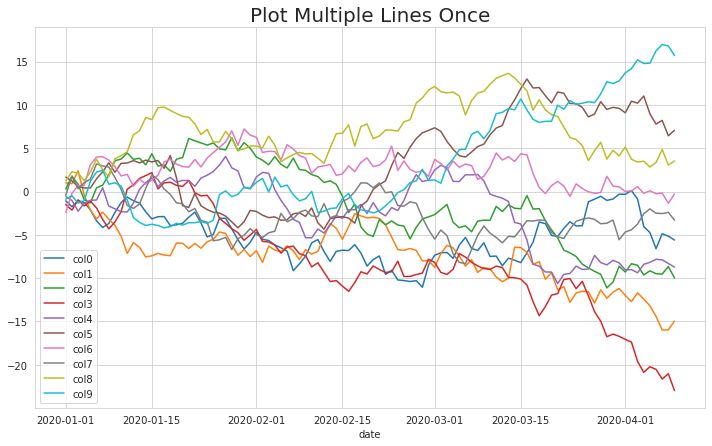

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.lineplot(data=df_wide, dashes=False, ax=ax)

title = ax.set_title("Plot Multiple Lines Once", fontsize=20)